# Covariance Matrix

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

# Part 1 - Square of a matrix

A random vector $Y = [Y_1, Y_2]^T$ has the covariance matrix

$$C_Y = \begin{bmatrix}
25 & 1 \\
1 & 9 
\end{bmatrix}$$

Using the concept of the square root of a matrix, find the $A$ matrix such that the random vector $X = AY$ cas the following covariance matrix:

$$C_X = \begin{bmatrix}
1 & 0.1 \\
0.1 & 2 
\end{bmatrix}$$

In [4]:
# Declare the matrices
Cy = np.array([[25, 1], [1, 9]])
Cx = np.array([[1, 0.1], [0.1, 2]])

# Obtain the eigenvectors of Cx
valsCx, vectsCx = np.linalg.eig(Cx) # linalg.eig returns normalized eigenvectors

# Create Lambda matrix with the eigenvalues
LambdaCx = np.array([[valsCx[0], 0], [0, valsCx[1]]])

# Creating the matrix G, with G = Cx^1/2
G = np.matmul(np.matmul(vectsCx, np.sqrt(LambdaCx)), vectsCx.T)
print(f'Matrix G calculated with the formula: \n {G}')
G2 = sqrtm(Cx)
print(f'\nMatrix G calculated with sqrtm function: \n {G2}')

Matrix G calculated with the formula: 
 [[0.99914072 0.04144654]
 [0.04144654 1.41360609]]

Matrix G calculated with sqrtm function: 
 [[0.99914072 0.04144654]
 [0.04144654 1.41360609]]


The square of the $C_X$ matrix was correctly calculated as $G = C_X^{1/2}$

Defining $H = C_X^{-1/2}$, we now demonstrate that $C_X = AC_YA^T$, where $A = GH$

In [6]:
# Eigenvectors of Cy
valsCy, vectsCy = np.linalg.eig(Cy) # They come out normalized

# Creating matrix Lambda with the eigenvalues
LambdaCy = np.array([[valsCy[0], 0], [0, valsCy[1]]])
# Creating matrix Lambda with 1/eigenvalues
LambdaCy = np.array([[1/valsCy[0], 0], [0, 1/valsCy[1]]])

# Creating matrix H, with H = Cx^-1/2
H = np.matmul(np.matmul(vectsCy, np.sqrt(LambdaCy)), vectsCy.T)
print(f'Matrix H calculated with the formula = \n {H}')
H2 = sqrtm(Cy)
print(f'\nMatrix H calculated with sqrtm function = \n {H2}')

Matrix H calculated with the formula = 
 [[ 0.20027168 -0.00835627]
 [-0.00835627  0.33397203]]

Matrix H calculated with sqrtm function = 
 [[0.20006259 7.99582761]
 [7.99582761 0.33362337]]


In [7]:
A = np.matmul(G, H)
print(f'Matrix A = \n {A}')

print(f'\nIt is confirmed that the matrix Cx is given by ACyA^T = \n {np.matmul(np.matmul(A, Cy), A.T)}')

Matrix A = 
 [[ 0.19975325  0.00549289]
 [-0.00351191  0.47175856]]

It is confirmed that the matrix Cx is given by ACyA^T = 
 [[1.  0.1]
 [0.1 2. ]]


# Part 2 - Covariance Experiment

### a) Generate 5000 2-dimensional vectors with zero mean and variance $I_2$. Plot the points in the plane.

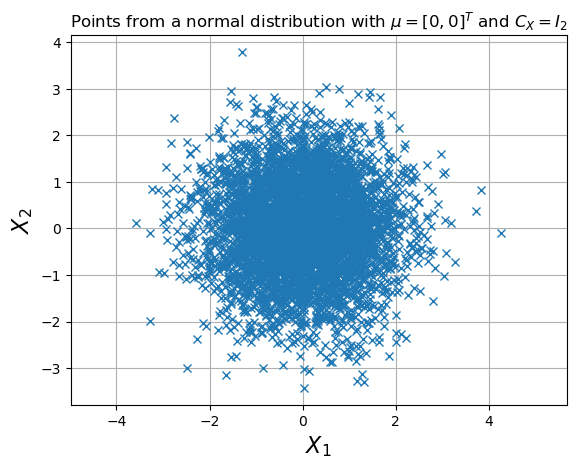

In [8]:
mux = np.array([0, 0])
Cx = np.eye(2)

X = np.random.multivariate_normal(mux, Cx, 5000)

plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')
plt.grid()
plt.title(r'Points from a normal distribution with $\mu = [0, 0]^T$ and $C_X = I_2$')
plt.xlabel(r'$X_1$', fontsize=16)
plt.ylabel(r'$X_2$', fontsize=16)
plt.show()


### b) It is desired to transform $X$ into a Gaussian random vector $Y = AX + b$ such that $$Y \sim N\left(\begin{bmatrix} 3 \\ -4 \end{bmatrix}, \begin{bmatrix} 2 & -1 \\ -1 & 9 \end{bmatrix}\right)$$ Find the values of $A$ and $b$ to do this. Use the concept of a matrix obtained from factorization using eigenvalues and eigenvectors.


In [9]:
muy = np.array([3, -4])
Cy = np.array([[2, -1], [-1, 9]])

# We know that Cy = ACxA^T, then A = Cy^{1/2}

# Eigenvalues and eigenvectors of Cy (already normalized)
valsCy, vectsCy = np.linalg.eig(Cy)

# Create Lambda matrix with eigenvalues
LambdaCy = np.array([[valsCy[0], 0], [0, valsCy[1]]])

# Create matrix A, with A = Cy^1/2
A = np.matmul(np.matmul(vectsCy, np.sqrt(LambdaCy)), vectsCy.T)
print(f'Matrix A calculated with the formula: \n {A}')
A2 = sqrtm(Cy)
print(f'\nMatrix A calculated with sqrtm function: \n {A2}')

Cy_test = np.matmul(np.matmul(A, Cx), A.T)
print(f'\nConfirming the value of\nCy = ACxA^T = \n {Cy_test}')

b = np.asarray(np.matrix(muy)).T
print(f'\nTo ensure that Y has a mean of [3, -4]^T, we choose\nb = \n {b}')
print('because the mean of X was at [0, 0]^T')


Matrix A calculated with the formula: 
 [[ 1.39572265 -0.22794359]
 [-0.22794359  2.99132775]]

Matrix A calculated with sqrtm function: 
 [[ 1.39572265 -0.22794359]
 [-0.22794359  2.99132775]]

Confirming the value of
Cy = ACxA^T = 
 [[ 2. -1.]
 [-1.  9.]]

To ensure that Y has a mean of [3, -4]^T, we choose
b = 
 [[ 3]
 [-4]]
because the mean of X was at [0, 0]^T


### c) Generate 5000 samples of $Y$ from the samples of $X$, using $A$ and $b$ (in a plane). You cannot use a predefined function to generate these points. Only from the observations of X. Graph these new samples. Does this plot make sense?


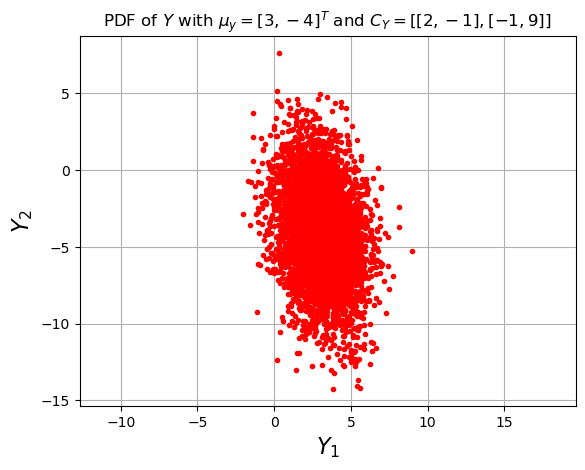

In [10]:
Y = np.zeros((5000, 2))

for i in range(len(Y)):
    Y[i] = (np.matmul(A, np.asarray(np.matrix(X[i])).T) + b).T

plt.plot(Y[:,0], Y[:,1], '.', color='red')
plt.axis('equal')
plt.grid()
plt.title(r'PDF of $Y$ with $\mu_y = [3, -4]^T$ and $C_Y = [[2, -1], [-1, 9]]$')
plt.xlabel(r'$Y_1$', fontsize=16)
plt.ylabel(r'$Y_2$', fontsize=16)
plt.show()


This graph makes sense because it can be noticed that the distribution of the data is centered at [3, -4], and also it can be observed that the shape of the distribution along the $Y_1$ axis is small (the oval has a small width), due to the small variance of the variable $Y_1$, which is equal to 2.

Meanwhile, it can be noticed that the shape of the distribution along the $Y_2$ axis is large (the oval is elongated), and this is due to the variance of the variable $Y_2$, which is equal to 9 and therefore is larger than the variance of the variable $Y_1$.


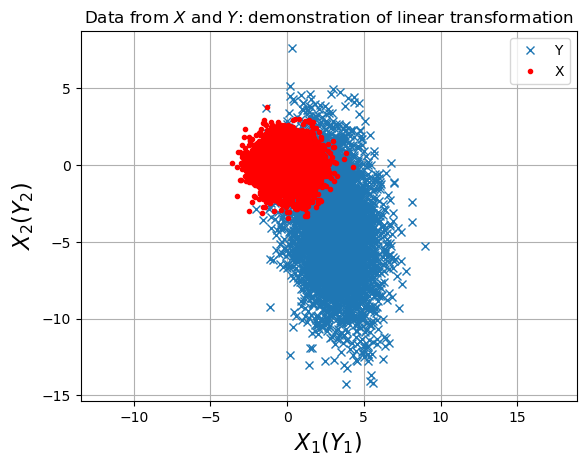

In [11]:
plt.plot(Y[:,0], Y[:,1], 'x')
plt.plot(X[:,0], X[:,1], '.', color='red')
plt.axis('equal')
plt.grid()
plt.title(r'Data from $X$ and $Y$: demonstration of linear transformation')
plt.legend(labels=["Y", "X"])
plt.xlabel(r'$X_1 (Y_1)$', fontsize=16)
plt.ylabel(r'$X_2 (Y_2)$', fontsize=16)
plt.show()


### d) Find theoretically the PDF of the first coordinate of $Y$ and the PDF of the second coordinate of $Y$ (call them $Y_1$ and $Y_2$). Plot the histogram of $Y_1$ and $Y_2$ using the 5000 samples from the previous question, and overlay it with the true corresponding PDFs (i.e., the PDFs theoretically calculated).


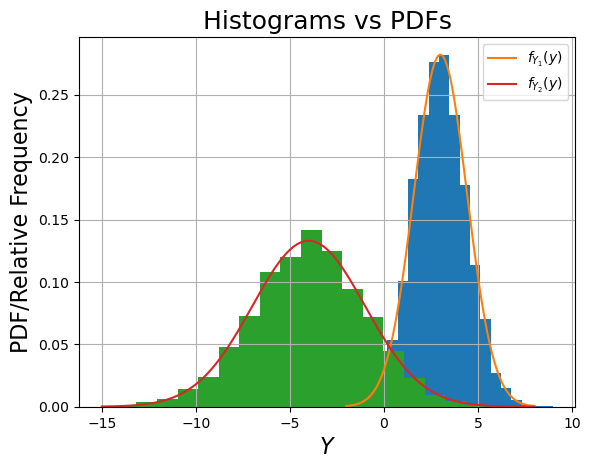

In [19]:
def Y1(y1, muy1, vary1):
    return (1/(np.sqrt(2*np.pi*vary1)))*np.exp(-0.5*(y1-muy1)**2/(vary1))

def Y2(y2, muy2, vary2):
    return (1/(np.sqrt(2*np.pi*vary2)))*np.exp(-0.5*(y2-muy2)**2/(vary2))

size = 5000
y1 = np.linspace(-2, 8, size)
y2 = np.linspace(-15, 8, size)

Y1_vec = np.zeros((len(y1), 1))
Y2_vec = np.zeros((len(y2), 1))

muy1 = 3
muy2 = -4

vary1 = 2
vary2 = 9

for i in range(size):
    Y1_vec[i] = Y1(y1[i], muy1, vary1)
    Y2_vec[i] = Y2(y2[i], muy2, vary2)

plt.figure()
m, bins, patches = plt.hist(Y[:,0], 20, density=True)
plt.plot(y1, Y1_vec)
m, bins, patches = plt.hist(Y[:,1], 20, density=True)
plt.plot(y2, Y2_vec)
plt.title(r'Histograms vs PDFs', fontsize=18)
plt.xlabel(r'$Y$', fontsize=16)
plt.ylabel('PDF/Relative Frequency', fontsize=16)
plt.grid()
plt.legend(labels=[r'$f_{Y_1}(y)$', r'$f_{Y_2}(y)$'])
plt.show()